In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
df = pd.read_csv('Churn_Modelling.csv')

In [29]:
df.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df.shape

(10000, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [33]:
df['Exited'].value_counts()/len(df)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [34]:
churn_rate = df['Exited'].value_counts()/len(df)*100

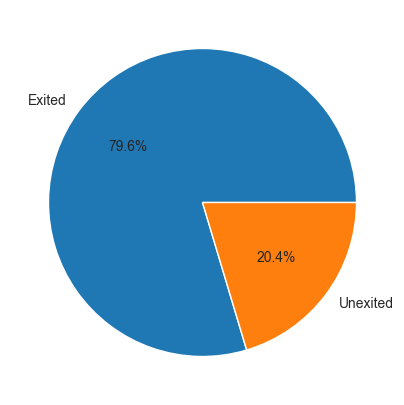

In [35]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Exited', 'Unexited'], autopct='%1.1f%%')
plt.show()

In [36]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [37]:
df['Geography'] = df['Geography'].map({'France': 1,
    'Spain': 2,
    'Germany': 3,})

In [38]:
df['Geography'].head()

0    1
1    2
2    1
3    1
4    2
Name: Geography, dtype: int64

In [39]:
df['Geography'] = df['Geography'].astype('int64')

In [40]:
df['Geography'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Geography
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [41]:
df['Exited'].corr(df['Geography'])

0.1537705786571951

In [42]:
df['Gender'] = df['Gender'].map({'Male': 1,
    'Female': 2})

In [43]:
df['Geography'] = df['Geography'].astype(int) 

In [44]:
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Gender
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [61]:
data = df[['CreditScore','Age','Tenure','Gender','Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography']]

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Gender           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Geography        10000 non-null  int32  
dtypes: float64(2), int32(1), int64(8)
memory usage: 820.4 KB


In [63]:
data.head()

,CreditScore,Age,Tenure,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography
0,619,42,2,2,0.00,1,1,1,101348.88,1,1
1,608,41,1,2,83807.86,1,0,1,112542.58,0,2
2,502,42,8,2,159660.80,3,1,0,113931.57,1,1
3,699,39,1,2,0.00,2,0,0,93826.63,0,1
4,850,43,2,2,125510.82,1,1,1,79084.10,0,2


In [64]:
data.corr()['Exited']

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Gender             0.106512
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Geography          0.153771
Name: Exited, dtype: float64

In [65]:
data.drop(columns=['CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], axis=1, inplace=True)

C:\Users\ACER i7\AppData\Local\Temp\ipykernel_12860\161738763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], axis=1, inplace=True)


In [66]:
data.head()

,Age,Gender,Balance,Exited,Geography
0,42,2,0.00,1,1
1,41,2,83807.86,0,2
2,42,2,159660.80,1,1
3,39,2,0.00,0,1
4,43,2,125510.82,0,2


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        10000 non-null  int64  
 1   Gender     10000 non-null  int64  
 2   Balance    10000 non-null  float64
 3   Exited     10000 non-null  int64  
 4   Geography  10000 non-null  int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 351.7 KB


In [68]:
data.corr()['Exited']

Age          0.285323
Gender       0.106512
Balance      0.118533
Exited       1.000000
Geography    0.153771
Name: Exited, dtype: float64

In [69]:
data.head()

,Age,Gender,Balance,Exited,Geography
0,42,2,0.00,1,1
1,41,2,83807.86,0,2
2,42,2,159660.80,1,1
3,39,2,0.00,0,1
4,43,2,125510.82,0,2


In [70]:
data.corr()['Exited']

Age          0.285323
Gender       0.106512
Balance      0.118533
Exited       1.000000
Geography    0.153771
Name: Exited, dtype: float64

In [71]:
data.shape

(10000, 5)

In [72]:
X = data.drop("Exited", axis=1)
y = data['Exited']

In [73]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1593
           1       0.46      0.13      0.20       407

    accuracy                           0.79      2000
   macro avg       0.63      0.54      0.54      2000
weighted avg       0.74      0.79      0.74      2000

Model accuracy: 0.7915


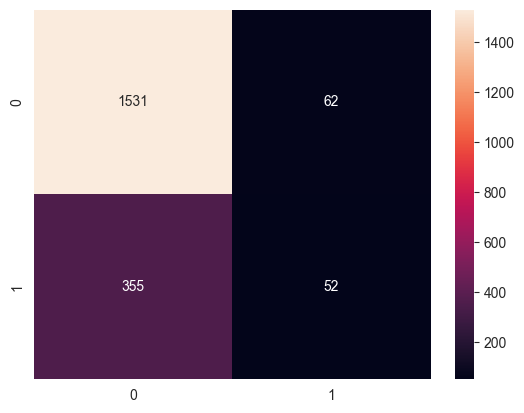

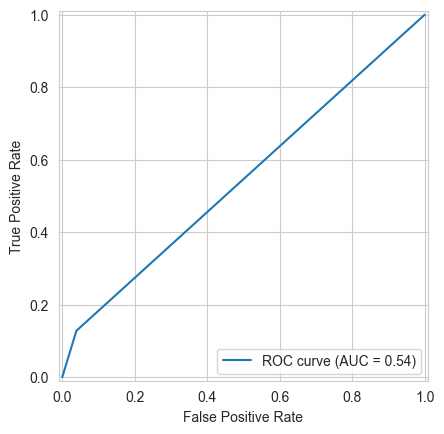

In [75]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1593
           1       0.64      0.24      0.34       407

    accuracy                           0.82      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000

Model accuracy: 0.817


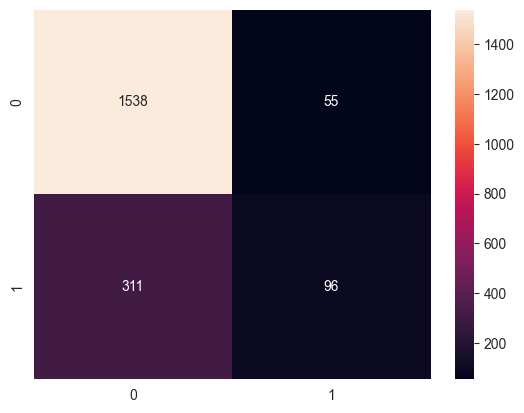

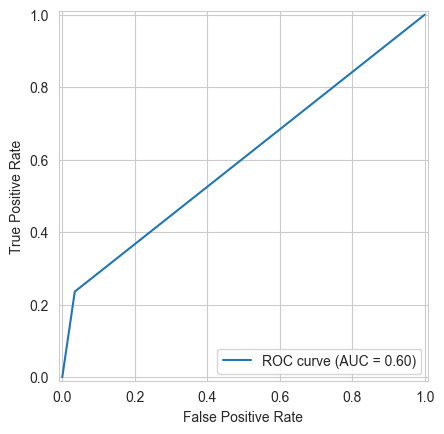

In [79]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1593
           1       0.35      0.30      0.33       407

    accuracy                           0.74      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.73      0.74      0.74      2000

Model accuracy: 0.743


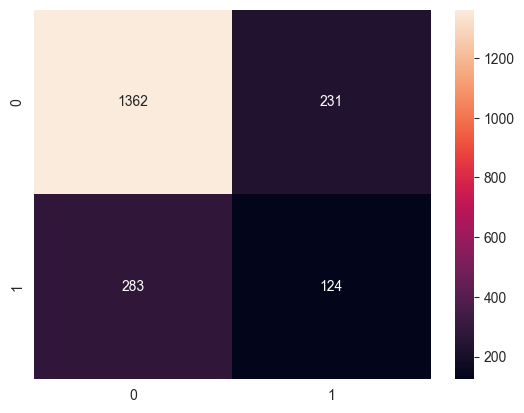

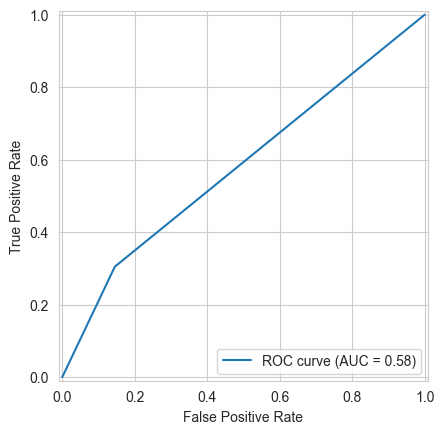

In [84]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()
     

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1593
           1       0.41      0.31      0.35       407

    accuracy                           0.77      2000
   macro avg       0.62      0.60      0.61      2000
weighted avg       0.75      0.77      0.76      2000

Model accuracy: 0.7695


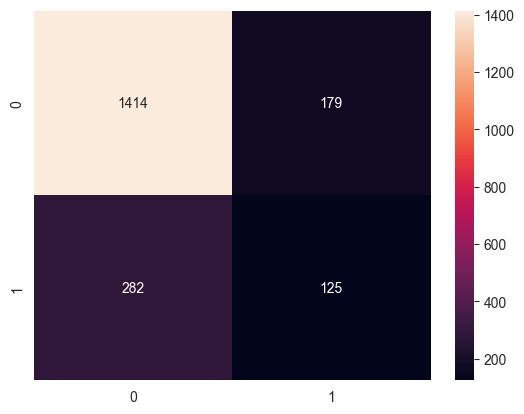

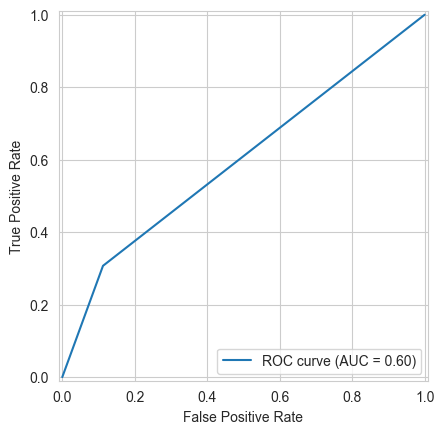

In [85]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1593
           1       0.48      0.31      0.38       407

    accuracy                           0.79      2000
   macro avg       0.66      0.61      0.63      2000
weighted avg       0.77      0.79      0.77      2000

Model accuracy: 0.7925


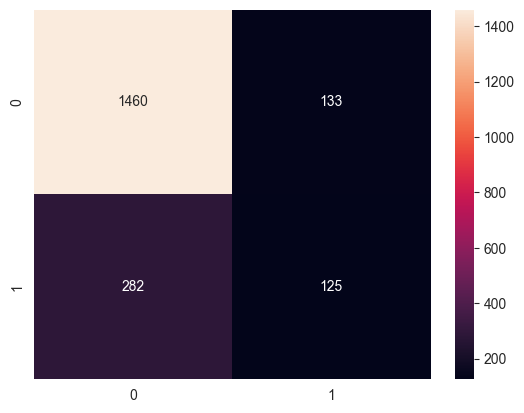

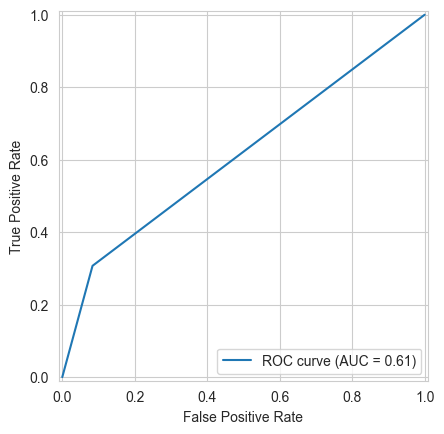

In [86]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1593
           1       0.57      0.30      0.39       407

    accuracy                           0.81      2000
   macro avg       0.71      0.62      0.64      2000
weighted avg       0.79      0.81      0.79      2000

Model Accuracy: 0.812


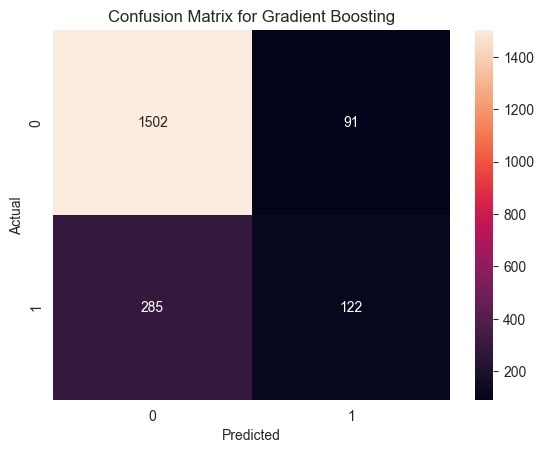

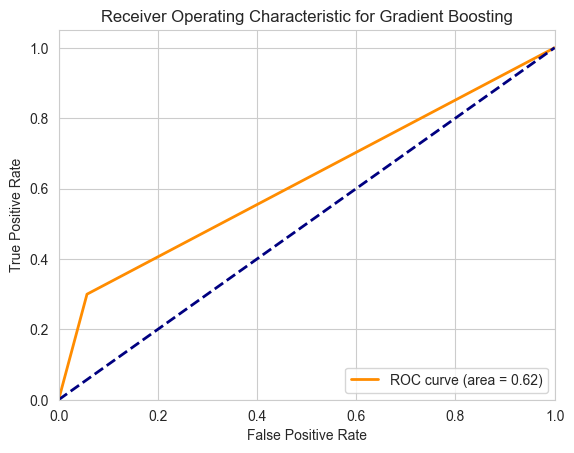

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Model Accuracy:", accuracy_gb)

conf_mat_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_mat_gb, annot=True, fmt="g")
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()
